#  Exploratory Data Analysis (EDA) on Ecommerce Dataset



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import pandas as pd
df = pd.read_csv("Telco-Customer-Churn.csv")

In [10]:
# Display first few rows
display(df.head())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [14]:
display(df.describe())


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Handling Missing Values

In [17]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [59]:
df = df.assign(TotalCharges=df["TotalCharges"].fillna(df["TotalCharges"].median()))


In [25]:
print("Missing values after handling:")


Missing values after handling:


In [27]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Encoding Categorical Variables

In [32]:
df_encoded = pd.get_dummies(df.drop(columns=["customerID"]), drop_first=True)


# Univariate Analysis

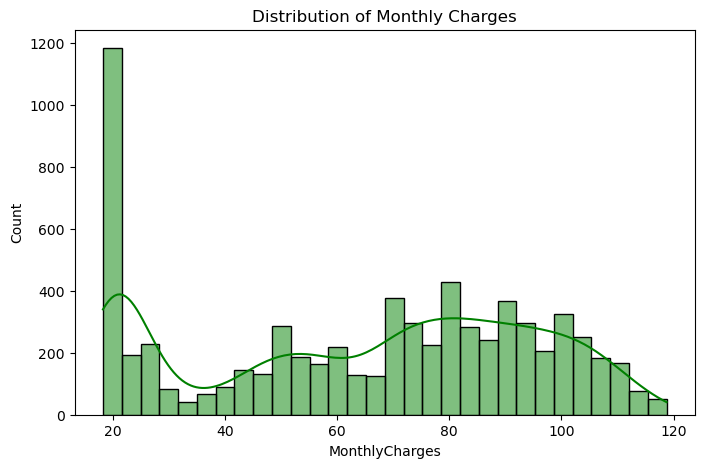

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color='green')
plt.title("Distribution of Monthly Charges")
plt.show()

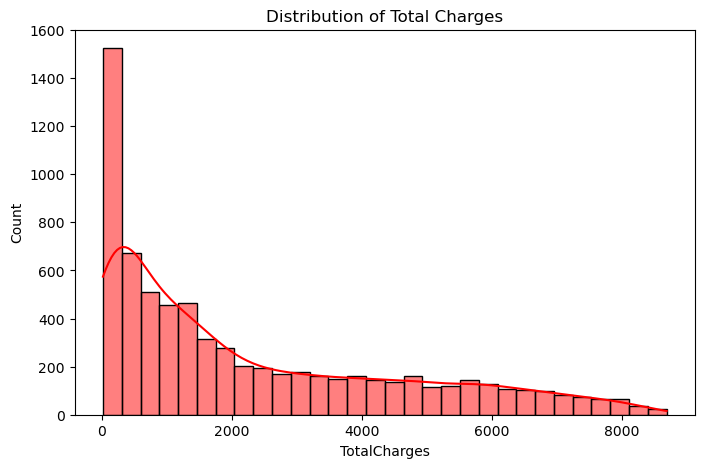

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df["TotalCharges"], bins=30, kde=True, color='red')
plt.title("Distribution of Total Charges")
plt.show()

# Bivariate Analysis

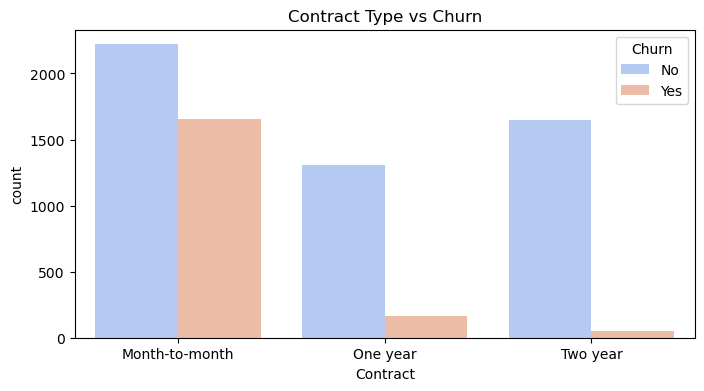

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Contract"], hue=df["Churn"], palette="coolwarm")
plt.title("Contract Type vs Churn")
plt.show()

# Correlation Analysis

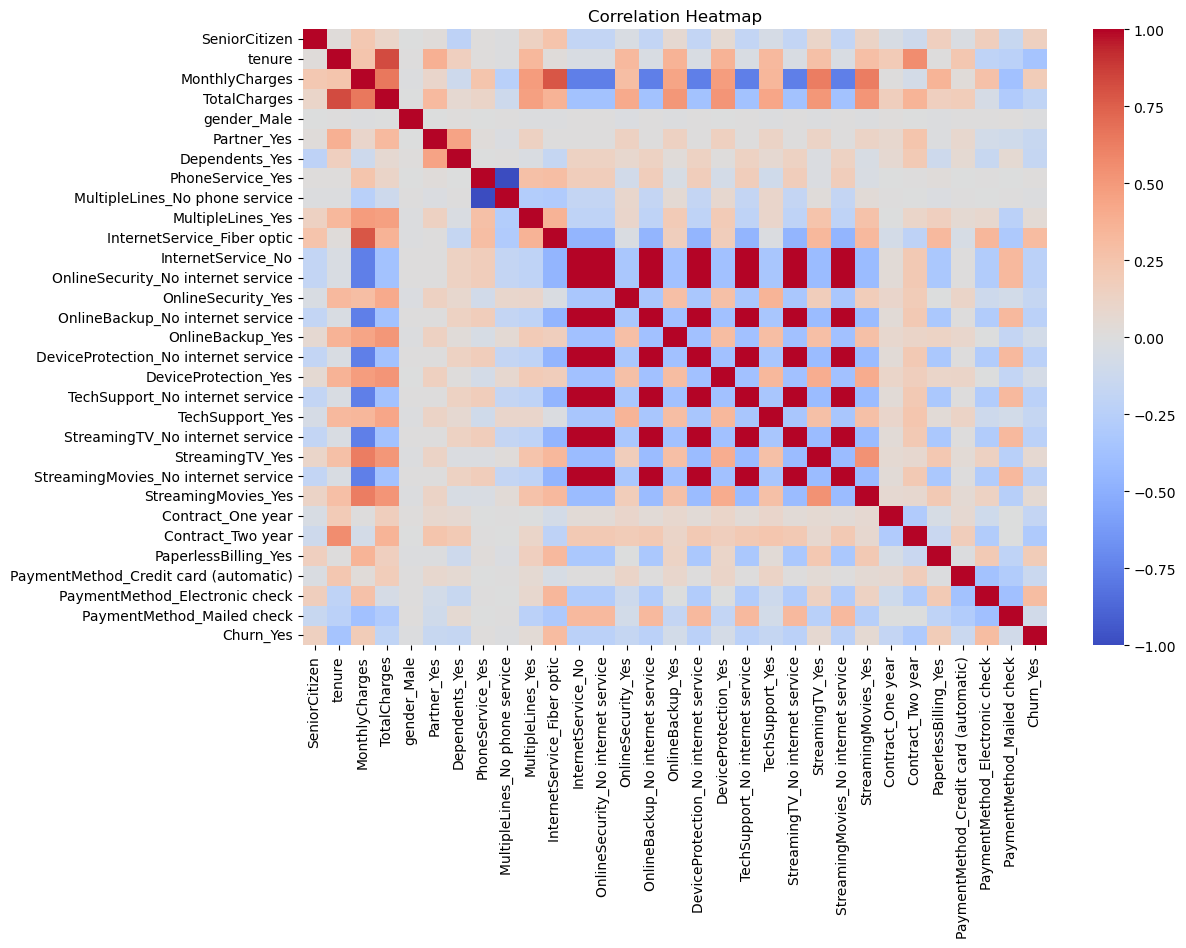

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Outlier Detection

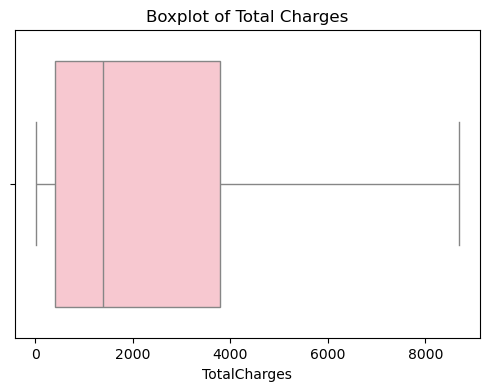

In [56]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["TotalCharges"], color='pink')
plt.title("Boxplot of Total Charges")
plt.show()

# Key Insights

In [ ]:
1. Many customers have lower TotalCharges, indicating short-term subscriptions.
2. Churn rates are higher among month-to-month contract users.
3. Senior citizens have a higher likelihood of churn.
4. Fiber optic users show a higher churn rate compared to DSL users.
5. Payment method choice (electronic checks) is correlated with higher churn.
